#### Topic: Clustering and Expectation Maximization
#### Q 1. Implement the EM algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io   #library for reading and writing images
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
def EMG(image_path, k):
    image = io.imread(image_path)

    #Now converting 3d image to 2d array data. Rows will represent pixels and columns will represent RGB values.
    image_data = np.reshape(image, (-1, 3)) 

    # Now we will perform K means clustering to form the cluster of the array data obtained above.
    kMeans = KMeans(n_clusters=k,n_init=5, max_iter=3).fit(image_data) 

    # mean of the cluster centere are stored in m having k*n dimnesion.
    m = kMeans.cluster_centers_ 

    # matrix that will store covariance for each cluster of size k x [3 x 3]
    sigma = np.zeros((k, 3, 3)) 

    #calculating the covariance of each cluster.
    for i in range(k):  
        sigma[i] = np.cov(image_data[kMeans.labels_ == i].T)

    #storing the probabilities of each data points belonging to a cluster.
    h = np.zeros((image_data.shape[0], k)) 

    #Empty list Q to store the expected complete log likelihood values at each iteration of EM algorithm
    Q = list(())

    # this loop will perform EM Steps for maximum number of iterations which are 100
    for i in range(100): 
        #E-step of EM algorithm
        for j in range(k): 
            h[:, j] = multivariate_normal.pdf(image_data, mean=m[j], cov=sigma[j]) 
        #after finding the probability density for all clusters and storing in h and then normalising h. Row in h represent data point and column represent probabilites of that point for each cluster
        h /= np.sum(h, axis=1, keepdims=True) 

        #append the values in Q
        Q.append((i,np.sum(np.log(np.sum(h, axis=1)))))

        
        # Now M-step. The M-step involves updating the parameters of the model, which in this case are the mean and covariance of each cluster.
        for j in range(k):
            # The mean of each cluster is updated by taking a weighted average of the data points, where the weights are the membership probabilities of the data points for that cluster.
            m[j] = np.average(image_data, axis=0, weights=h[:, j])
            # The covariance matrix of each cluster is updated using the weighted data covariance function, where the weights are the membership probabilities of the data points for that cluster.
            sigma[j] = np.cov(image_data.T, aweights=h[:, j])

        #Now using the updated values of mean and covariance, M-step is done below
        for j in range(k): 
            h[:, j] = multivariate_normal.pdf(image_data, mean=m[j], cov=sigma[j]) 
        h /= np.sum(h, axis=1, keepdims=True) 
        #append in Q
        Q.append((i,np.sum(np.log(np.sum(h, axis=1))))) 

        #checking the values to stop the loop if difference is too small.
        if i > 0 and np.abs(Q[-1][1] - Q[-3][1]) < 1e-15: 
            break

    # Here I created a new array of zeros with the same shape and data type as the image_data array, which will be used to store the compressed data.
    compressedImageData = np.zeros_like(image_data) 

    # Below assigns the mean value of each cluster to every pixel in the compressed data that belongs to that cluster. It does this by using the cluster labels obtained from the K-means algorithm (K_means.labels_) to index into the compressed_data array and assign the corresponding mean value m[i] to each pixel in that cluster.
    for i in range(k):
        compressedImageData[kMeans.labels_ == i] = m[i] # mean for each point of every cluster

    compressedImage = np.reshape(compressedImageData, image.shape) # compressed image after reshaping

    # These lines display the compressed image using matplotlib's imshow function. The title of the plot indicates the value of k (number of clusters) used in the compression. 
    plt.imshow(compressedImage)
    plt.title('Compressed Image for k={}'.format(k)) 
    plt.axis('off')  #The axis is turned off to remove any ticks and labels.
    plt.show()

    x,y = zip(*Q)
    plt.plot(x[::2],y[::2], label='Q (Expectation Step)', color='blue')
    plt.plot(x[1::2],y[1::2], label='Q (Maximization Step)', color='yellow')
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Log-Likelihood')
    plt.title(f'Expected complete log-likelihood for k = {k}')
    plt.show()

    return h, m, Q
   

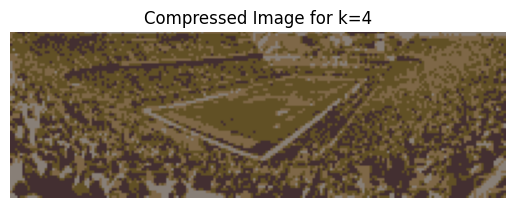

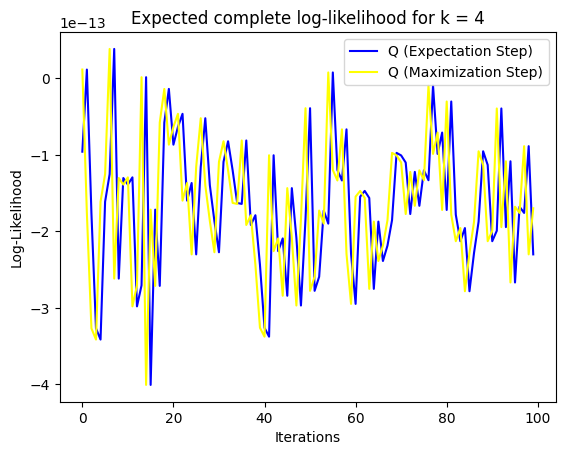

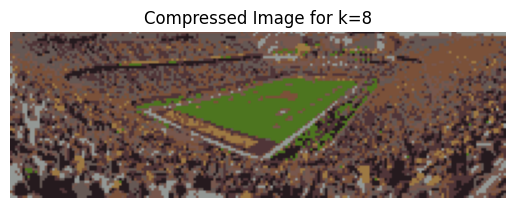

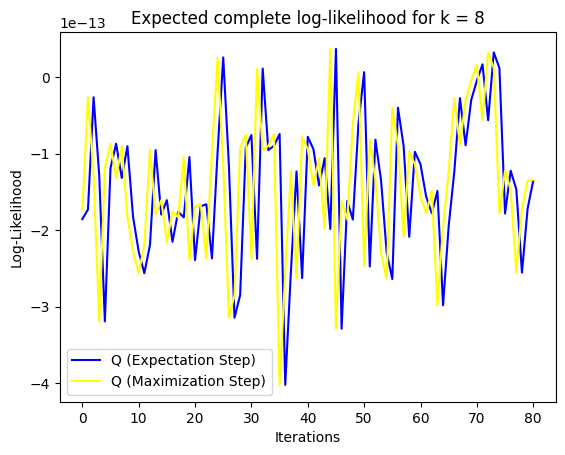

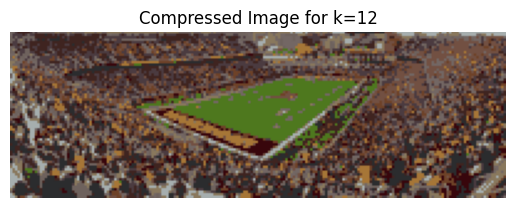

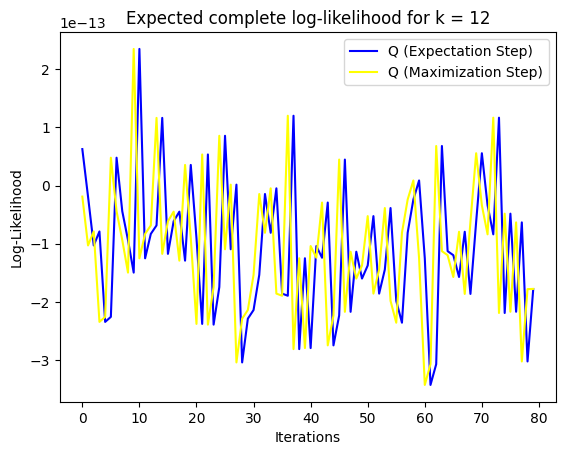

In [2]:
h, m, Q = EMG('stadium.bmp', 4) 
h, m, Q = EMG('stadium.bmp', 8) 
h, m, Q = EMG('stadium.bmp', 12)